# **Unsupervised Learning in Python**

# Clustering for dataset exploration

In [1]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('ggplot')

## Unsupervised learning

### K-means clustering for Iris dataset

In [2]:
# k-means clustering with scikit-learn

from sklearn.datasets import load_iris
samples = load_iris()['data']

In [3]:
print(samples[45:55])

[[4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]


In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(samples)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
labels = model.predict(samples)
print(labels[45:55])

[0 0 0 0 0 1 1 2 1 1]


In [6]:
# Cluster labels for new samples

new_samples = samples[-3:]
print(new_samples)

[[6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]


In [7]:
new_labels = model.predict(new_samples)
print(new_labels)

[2 2 1]


### Scatter plots

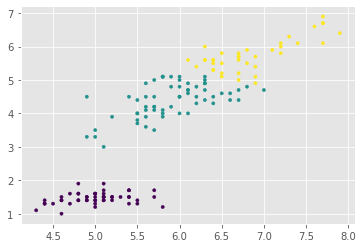

In [8]:
xs = samples[:,0]
ys = samples[:,2]
plt.scatter(xs, ys, c=labels, s=10)
plt.show()

In [9]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

NameError: name 'points' is not defined

In [10]:
# Inspect your clustering

# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels,alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

NameError: name 'new_points' is not defined

## Evaluating a clustering

### Cross tabulation with pandas

In [11]:
samples = load_iris()['data']
species = pd.Series(load_iris()['target']).map({0:'setosa',1:'versicolor',2:'virginica'})

In [12]:
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit and determine the cluster labels of new_points: labels
labels = model.fit_predict(samples)

In [13]:
df = pd.DataFrame({'labels': labels, 'species': species})
print(df[45:55])

    labels     species
45       0      setosa
46       0      setosa
47       0      setosa
48       0      setosa
49       0      setosa
50       1  versicolor
51       1  versicolor
52       2  versicolor
53       1  versicolor
54       1  versicolor


In [14]:
# Crosstab of labels and species

ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  setosa  versicolor  virginica
labels                                
0            50           0          0
1             0          48         14
2             0           2         36


In [15]:
# Inertia measures clustering quality

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(samples)
print(model.inertia_)

78.85144142614601


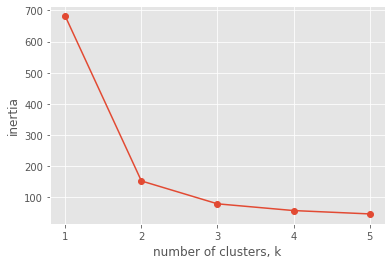

In [16]:
# The number of clusters

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [20]:
# Grain/Seed Dataset
data = pd.read_csv("seeds.csv",header=1)
samples = data.iloc[:,:-1].values
varieties = list(data.iloc[:,-1].map({1:'Kama wheat',2:'Rosa wheat',3:'Canadian wheat'}))

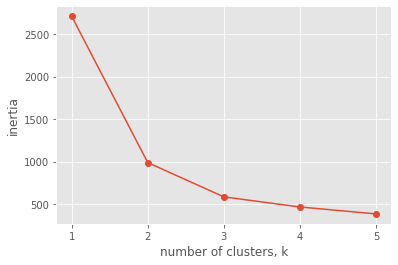

In [21]:
# How many clusters of grain?

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Based on sharp decline, the best number of clusters are 3.

In [22]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       2          58          10
1                       0           1          60
2                      68           9           0


## Transforming features for better clusterings

In [23]:
# Piedmont wines dataset

samples = pd.read_csv("wine.csv",header=0).iloc[:,2:].values
varieties = pd.read_csv("wine.csv",header=0).iloc[:,1]

In [24]:
# Clustering the wines

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)

In [25]:
# Clusters vs. varieties

df = pd.DataFrame({'labels': labels,'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0                0      46           1
1               29      13          20
2               19       0          50


In [26]:
# Feature variances

s=pd.read_csv("wine.csv",header=0).iloc[:,1:]
s.var()

alcohol                     0.659062
malic_acid                  1.248015
ash                         0.075265
alcalinity_of_ash          11.152686
magnesium                 203.989335
total_phenols               0.391690
flavanoids                  0.997719
nonflavanoid_phenols        0.015489
proanthocyanins             0.327595
color_intensity             5.374449
hue                         0.052245
od280                       0.504086
proline                 99166.717355
dtype: float64

In [27]:
# Pipelines sklearn StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [28]:
labels = pipeline.predict(samples)
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0                0       0          65
1                0      59           3
2               48       0           3


In [30]:
# Stocks data

data = pd.read_csv("company-stock-movements.csv")
companies = list(data.iloc[:,0])
movements = data.iloc[:,1:].values

In [31]:
# Clustering stocks using KMeans

# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)


Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [32]:
# Which stocks move together?

# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values(by='labels')[:15])


    labels          companies
29       0    Lookheed Martin
4        0             Boeing
36       0   Northrop Grumman
56       1           Wal-Mart
54       1           Walgreen
40       1     Procter Gamble
39       1             Pfizer
27       1     Kimberly-Clark
25       1  Johnson & Johnson
47       2           Symantec
43       2                SAP
30       2         MasterCard
23       2                IBM
17       2    Google/Alphabet
0        2              Apple


# Visualization with hierarchical clustering and t-SNE

In [33]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('ggplot')

from warnings import warn
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings("ignore")

In this chapter, we learn two unsupervised learning techniques for data visualization
- **hierarchical clustering**
    - merges the data samples into ever-coarser clusters, yielding a tree visualization of the resulting cluster hierarchy
- **t-SNE**
    - maps the data samples into 2d space so that the proximity of the samples to one another can be visualized

## Visualizing hierarchies

In [35]:
# Grain/Seed dataset

data = pd.read_csv("seeds.csv",header=1)[::3]
samples = data.iloc[:,:-1].values
varieties = list(data.iloc[:,-1].map({1:'Kama wheat',2:'Rosa wheat',3:'Canadian wheat'}))

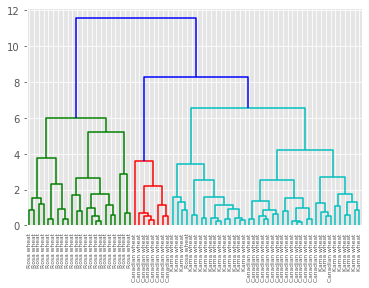

In [36]:
# Hierarchical clustering of the grain data

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples,method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [37]:
# Stocks data

data = pd.read_csv("company-stock-movements.csv")
companies = list(data.iloc[:,0])
movements = data.iloc[:,1:].values

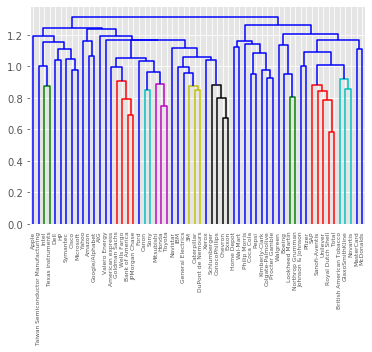

In [38]:
# Hierarchies of stocks

# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements,method='complete')

# Plot the dendrogram
dendrogram(mergings,labels=companies,leaf_rotation=90,leaf_font_size=6)
plt.show()


### Cluster labels in hierarchical clustering

In [40]:
# Grain/Seed dataset

data = pd.read_csv("seeds.csv",header=1)[::3]
samples = data.iloc[:,:-1].values
varieties = list(data.iloc[:,-1].map({1:'Kama wheat',2:'Rosa wheat',3:'Canadian wheat'}))

mergings = linkage(samples,method='complete')

In [41]:
# Extracting the cluster labels

# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings,6,criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          22
2                       8           0           0
3                       0          15           1
4                      16           8           0


## t-SNE for 2-dimensional maps

t-SNE = “t-distributed stochastic neighbor embedding”
- Maps samples to 2D space (or 3D)
- Map approximately preserves nearness of samples
- Great for inspecting datasets

In [42]:
# Iris dataset

from sklearn.datasets import load_iris
samples = load_iris()['data']
species = pd.Series(load_iris()['target'])#.map({0:'setosa',1:'versicolor',2:'virginica'})

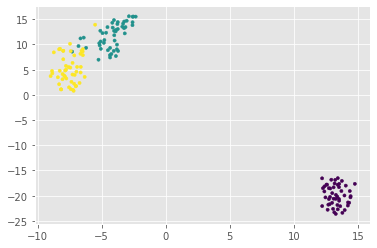

In [43]:
# t-SNE in sklearn

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(samples)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=species, s=10)
plt.show()

- Choose learning rate for the dataset
- Wrong choice: points bunch together
- Try values between 50 and 200

In [44]:
# Grain/Seed dataset

data = pd.read_csv("seeds.csv",header=1)[::3]
samples = data.iloc[:,:-1].values
variety_numbers = list(data.iloc[:,-1])

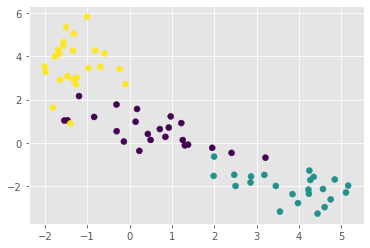

In [45]:
# t-SNE visualization of grain dataset

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=variety_numbers)
plt.show()

In [46]:
# Stocks data

data = pd.read_csv("company-stock-movements.csv")
companies = list(data.iloc[:,0])
movements = data.iloc[:,1:].values

# Normalize

from sklearn.preprocessing import normalize
normalized_movements = normalize(movements)

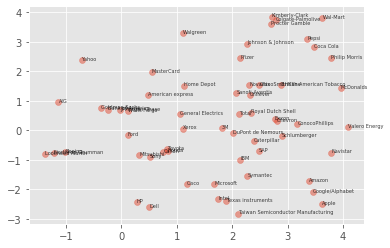

In [47]:
# A t-SNE map of the stock market

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

----